In [1]:
import pandas as pd

In [2]:
week1 = pd.read_csv('../week1.csv')

In [3]:
week1.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


In [4]:
gameId = 2018090600
playId = 75
oneplay = week1[(week1['gameId'] == gameId) & (week1['playId'] == playId)]
frame1 = oneplay[oneplay['frameId'] == 1]

In [5]:
list(frame1['x'])

[91.73,
 88.89,
 91.35,
 86.31,
 90.78,
 73.64,
 98.25,
 86.48,
 82.67,
 84.0,
 91.29,
 85.63,
 95.13,
 90.11]

In [6]:
import numpy as np
from matplotlib import pyplot as plt

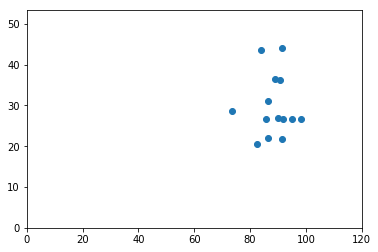

In [7]:
plt.scatter(frame1['x'], frame1['y'])
plt.xlim(0, 120)
plt.ylim(0, 53.3)
plt.show()

In [9]:
frame2 = oneplay[oneplay['frameId'] == 2]

In [24]:
def plot_play(x, y):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(x, y)
    ax.grid()
#     ax.set(xlabel='X', ylabel='x^{}'.format(power),
#            title='Powers of x')

    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    plt.xlim(0, 120)
    plt.ylim(0, 53.3)

    # Used to return the plot as an image array
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

In [25]:
frame_contents = list()
for frameId in range(0, oneplay['frameId'].max() + 1):
    frame = oneplay[oneplay['frameId'] == frameId]
    frame_contents.append([frame['x'], frame['y']])

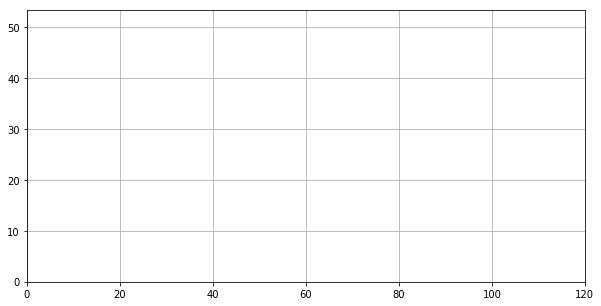

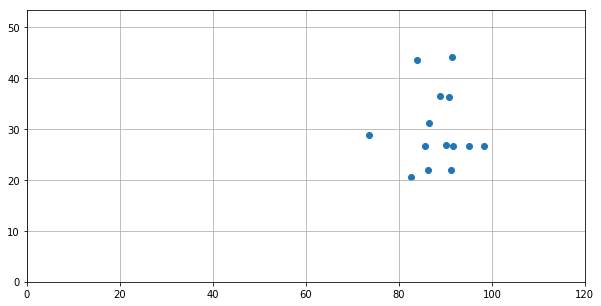

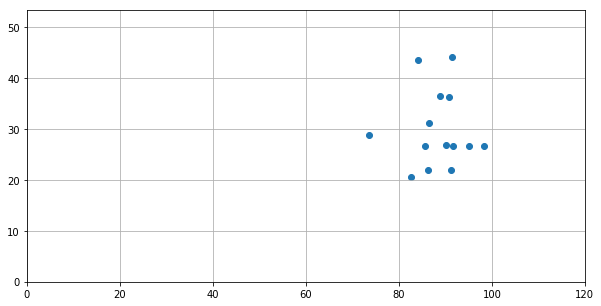

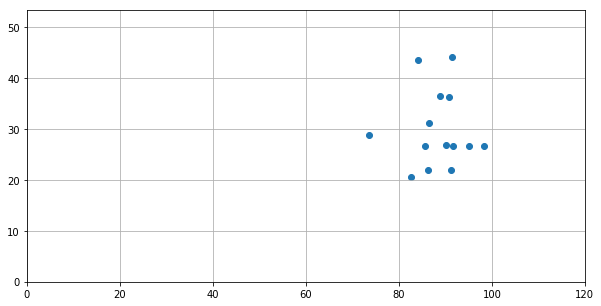

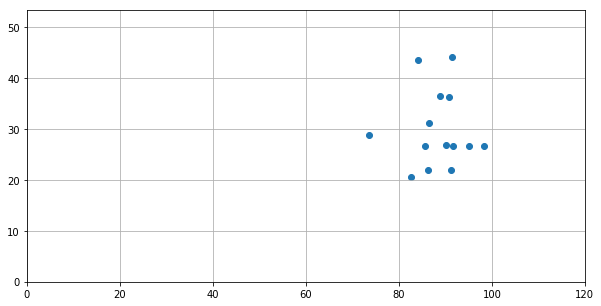

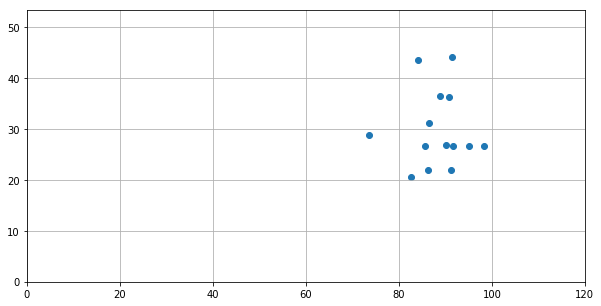

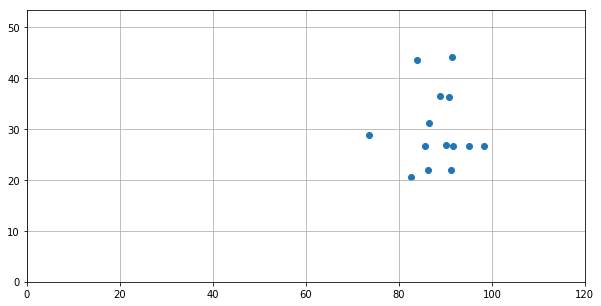

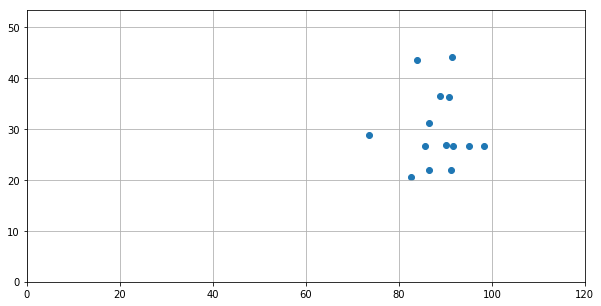

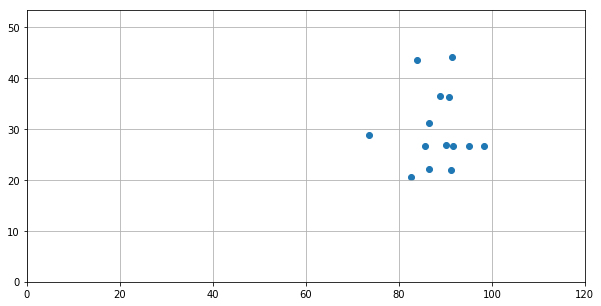

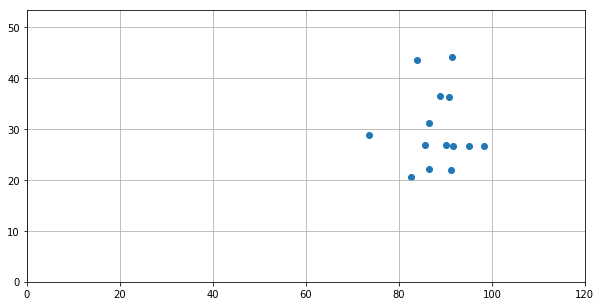

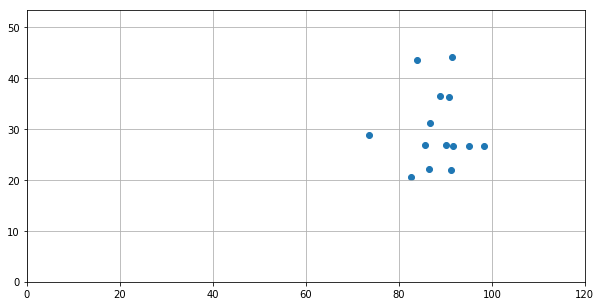

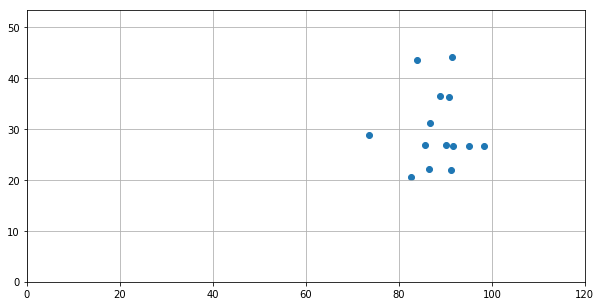

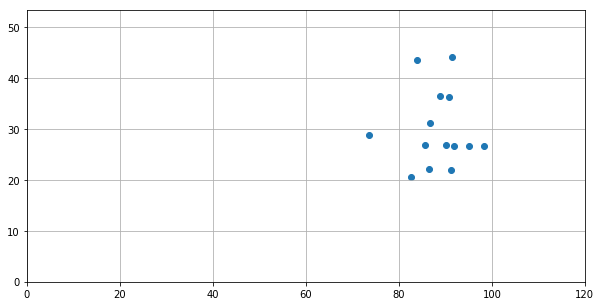

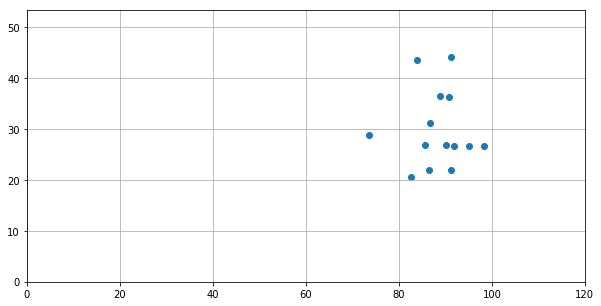

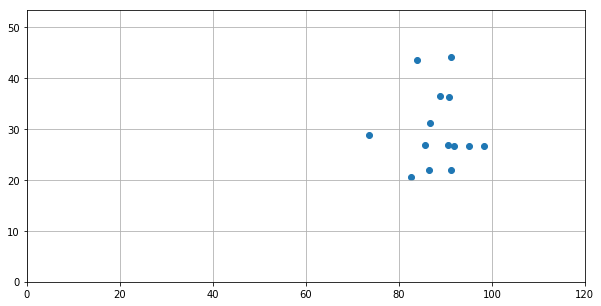

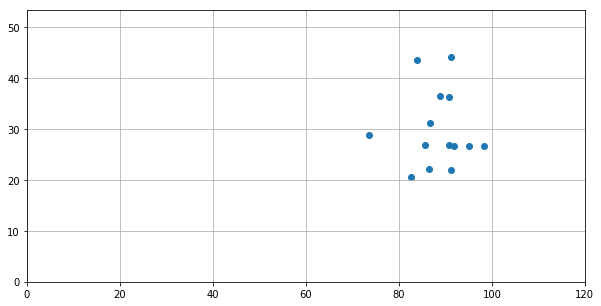

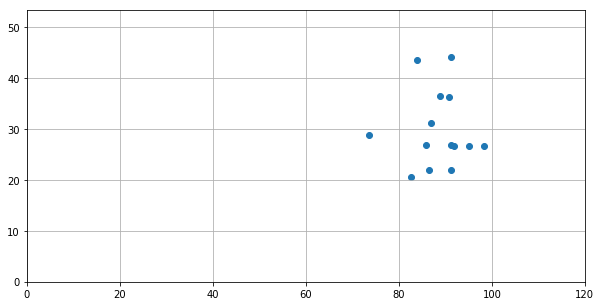

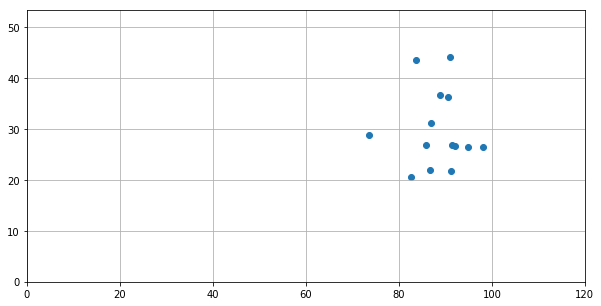

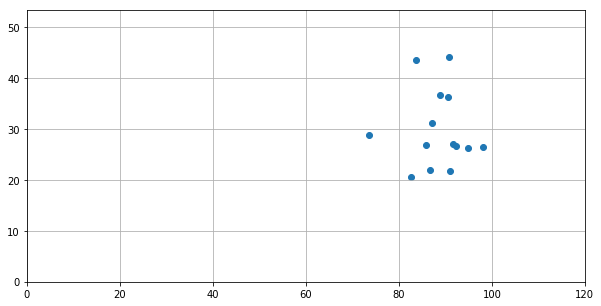

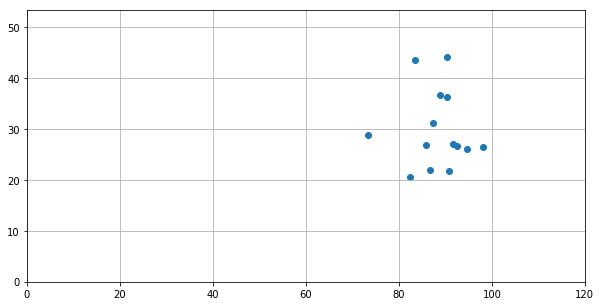

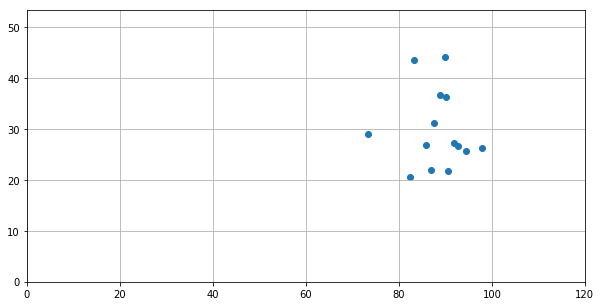

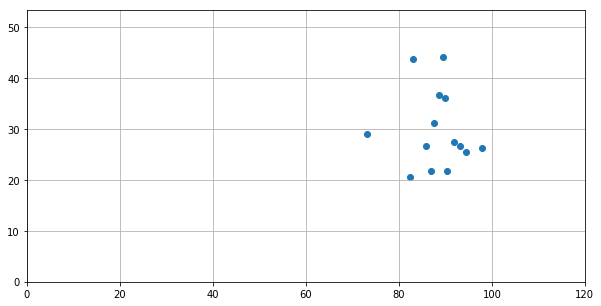

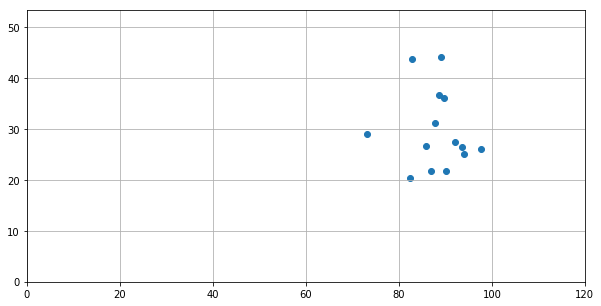

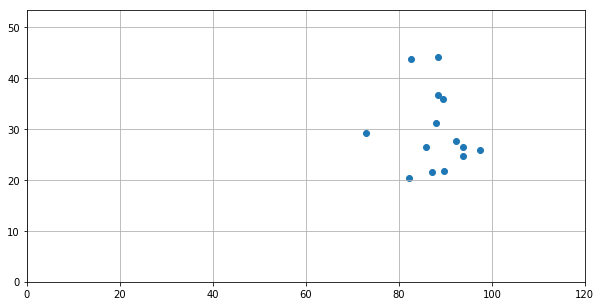

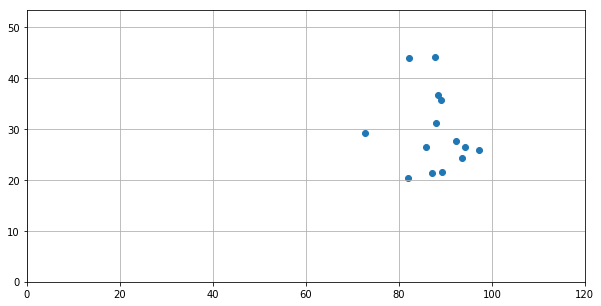

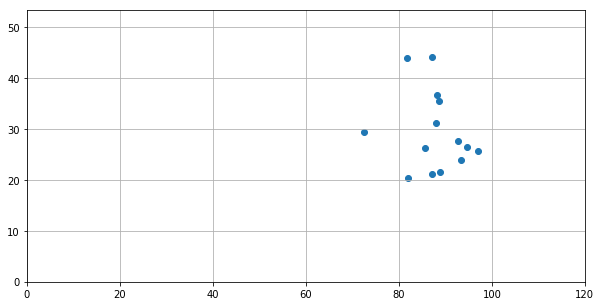

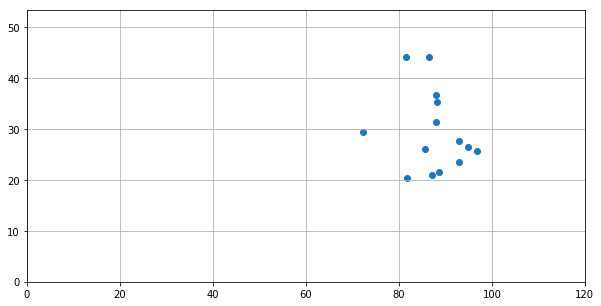

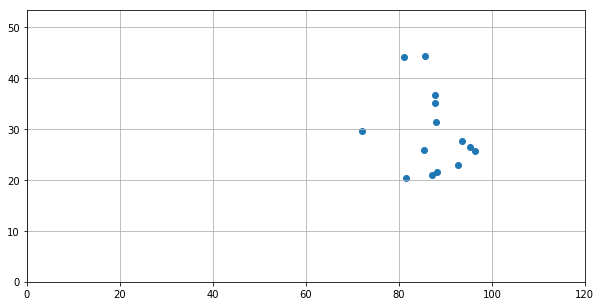

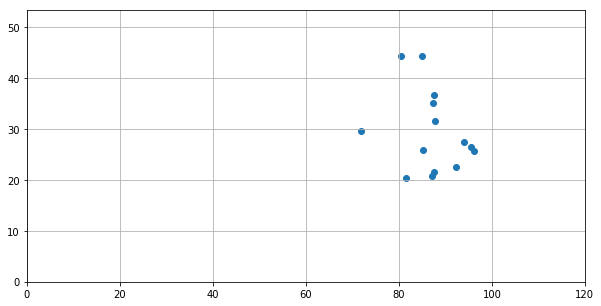

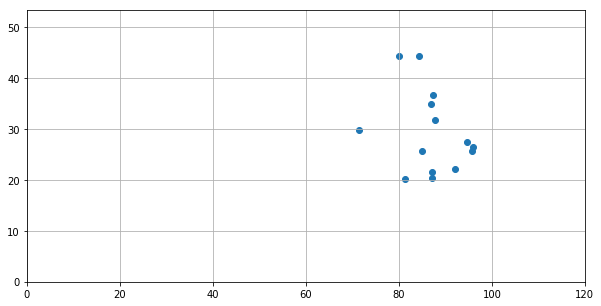

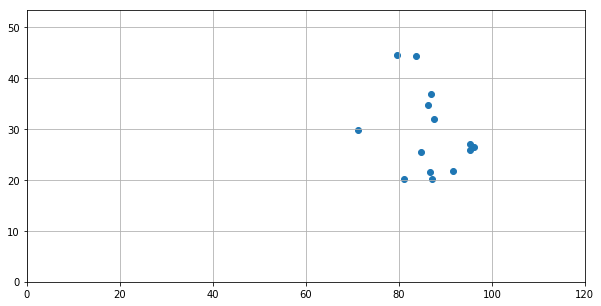

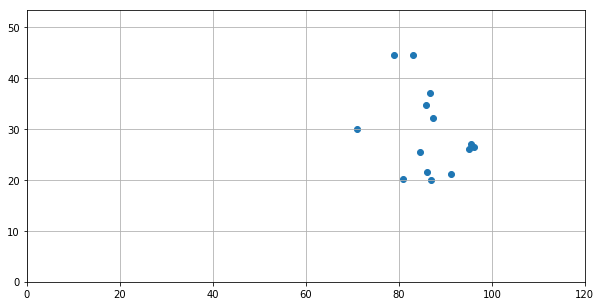

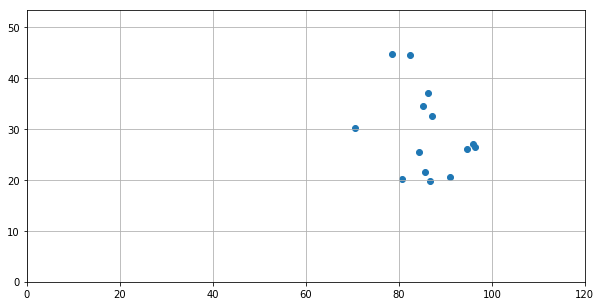

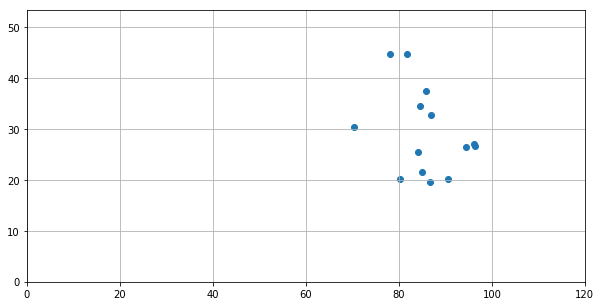

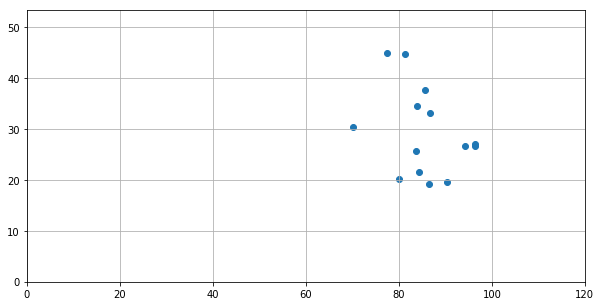

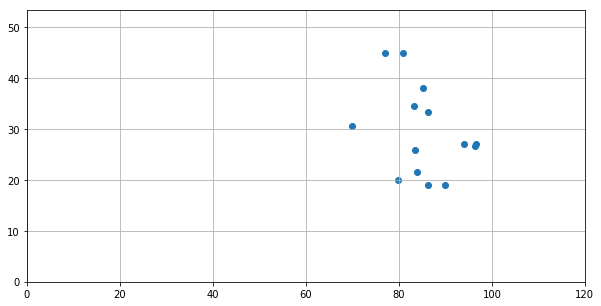

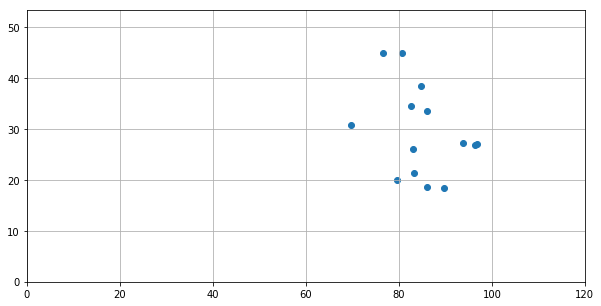

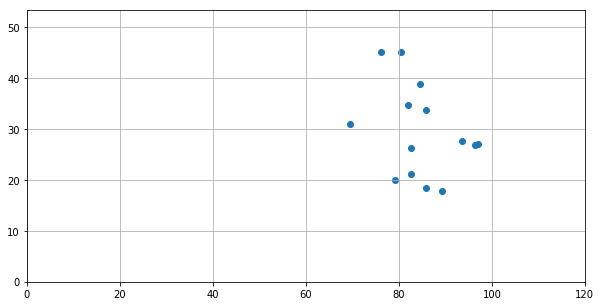

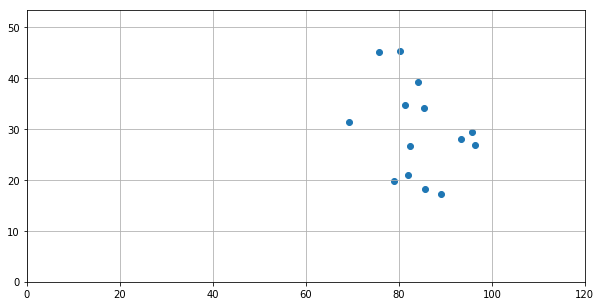

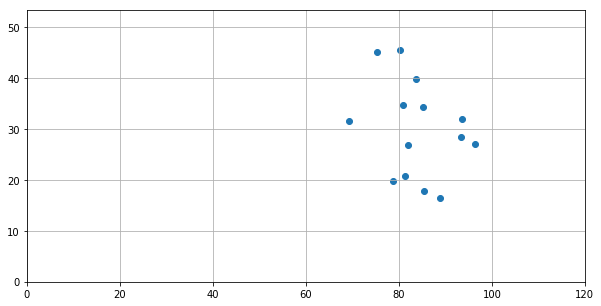

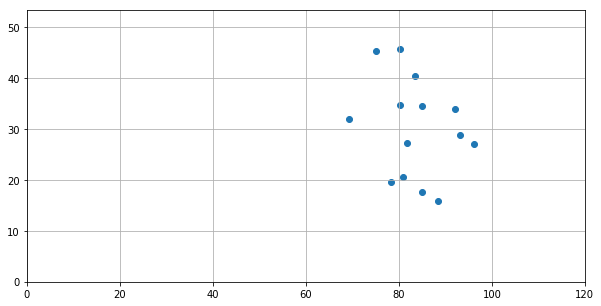

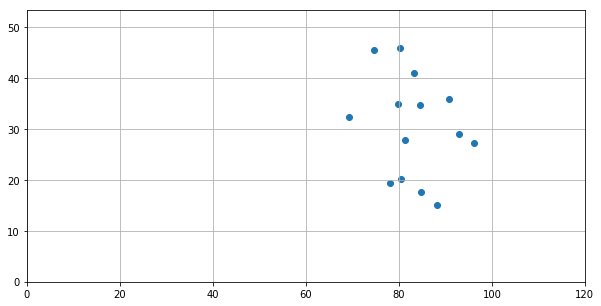

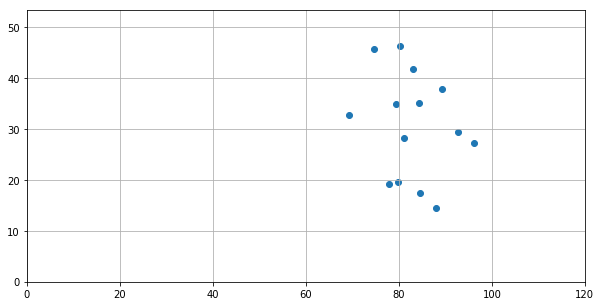

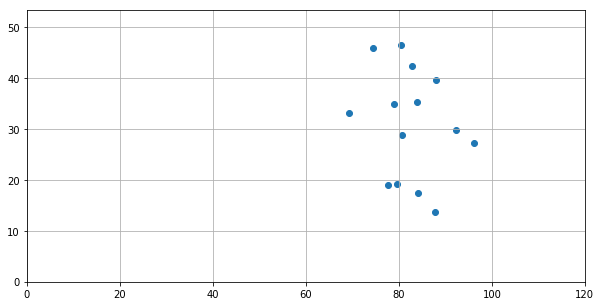

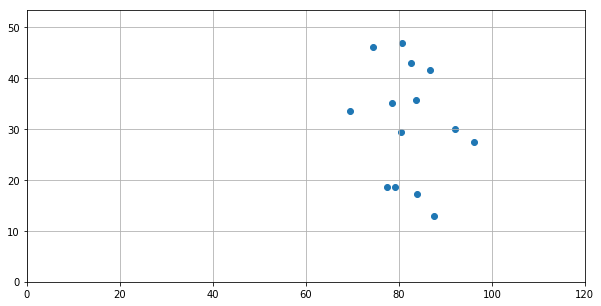

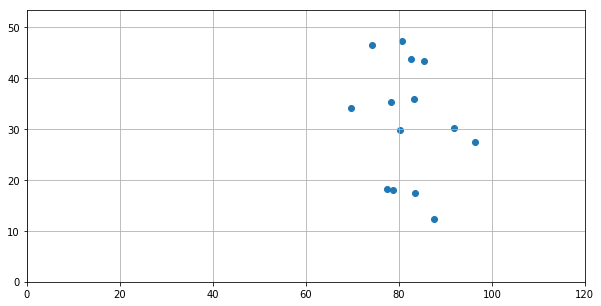

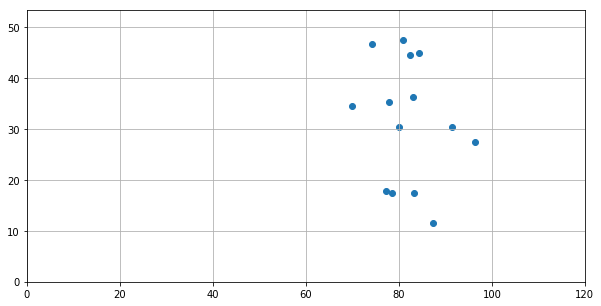

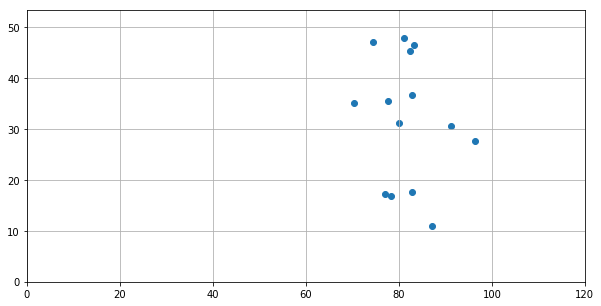

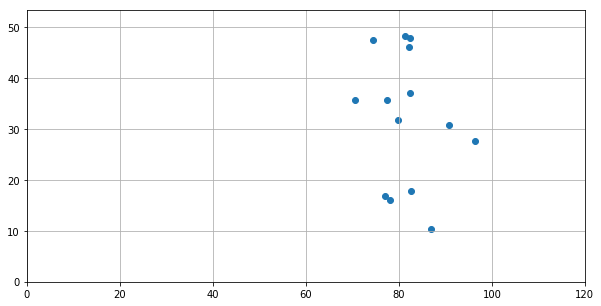

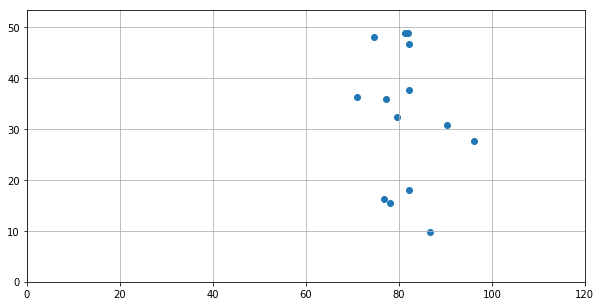

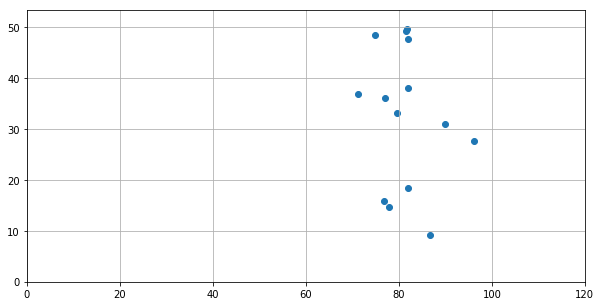

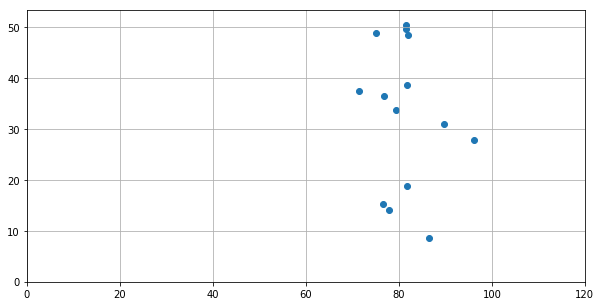

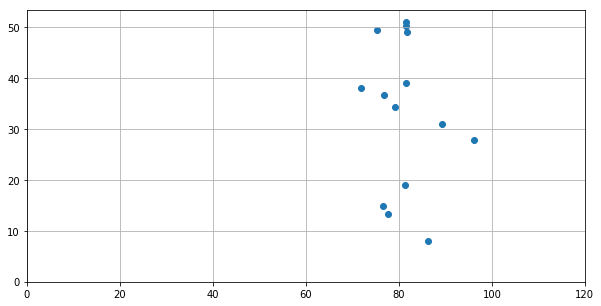

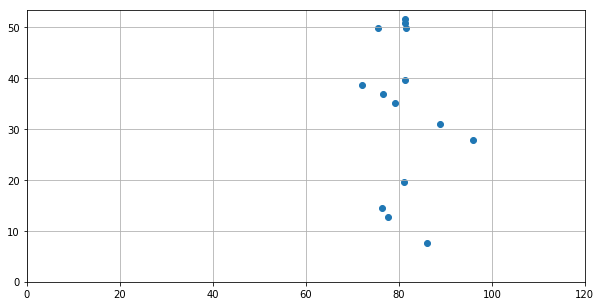

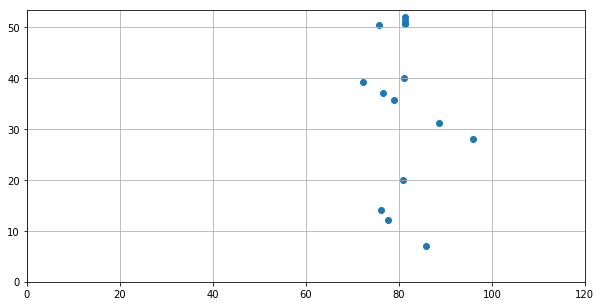

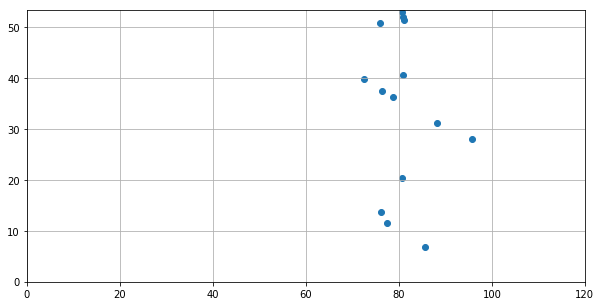

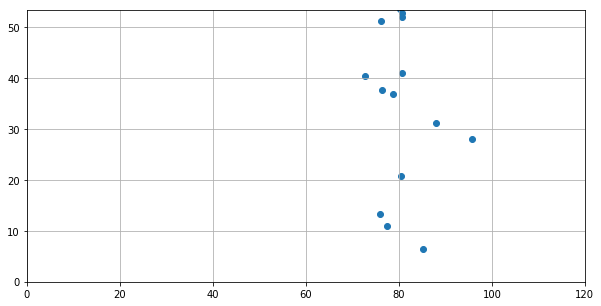

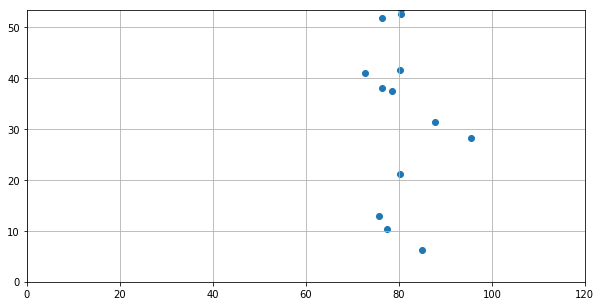

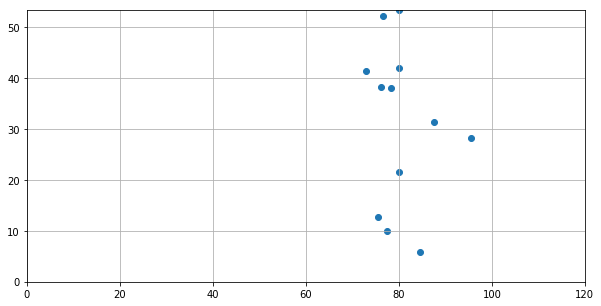

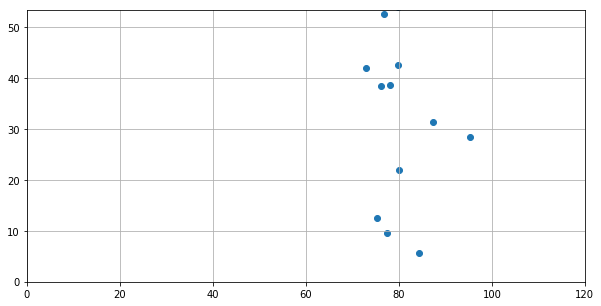

In [27]:
import imageio

kwargs_write = {'fps':1.0, 'quantizer':'nq'}

imageio.mimsave('./play.gif', [plot_play(x,y) for x, y in frame_contents], fps=2)